# 4.9 Data Viz with Python pt. 2
#### 01. Importing Libraries
#### 02. Importing Data
#### 03. Bar Charts
#### 04. Histograms and Scatter Plots
#### 05. Line Charts
#### 06. Task

# 01. Importing Libraries

In [1]:
#Import libraries - pandas, Numpy, OS
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A4\Instacart Basket Analysis 11-2022'

In [3]:
#Importing ords_prods_agged
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_agged.pkl'))

# 03. Bar Charts

<AxesSubplot:>

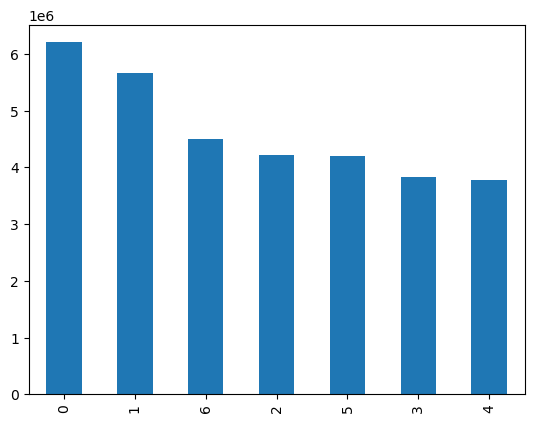

In [4]:
#Bar chart for days of the week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

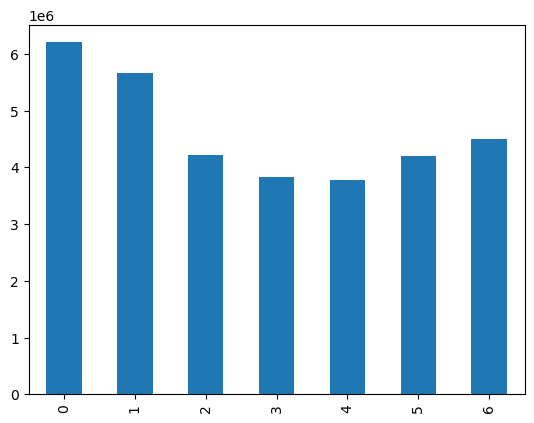

In [5]:
#Bar chart for days of the week sorted by day
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

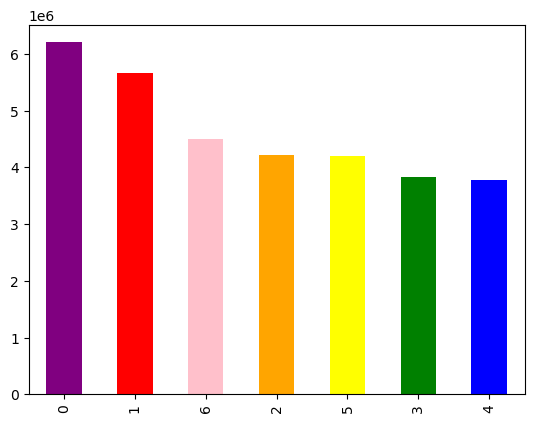

In [6]:
#Bar chart with defined colors
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

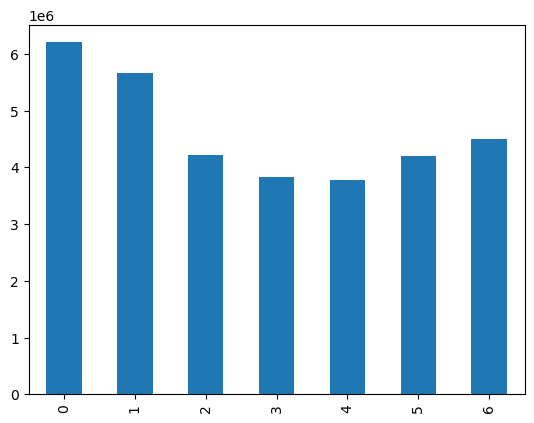

In [7]:
#Assign chart to a variable
bar1 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

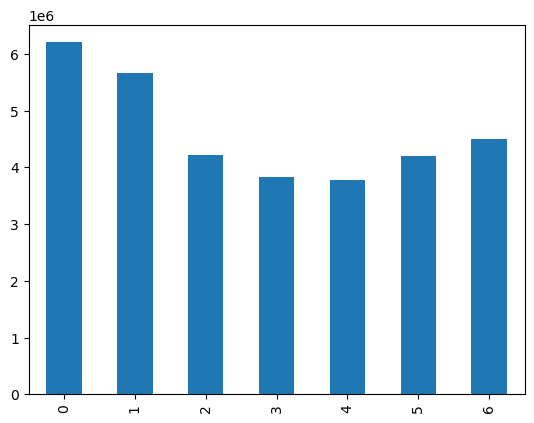

In [8]:
#Re-display it via vairable.figure
bar1.figure

In [9]:
#Export bar chart via variable.figure.savefig()
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04. Histograms and Scatter Plots

<AxesSubplot:ylabel='Frequency'>

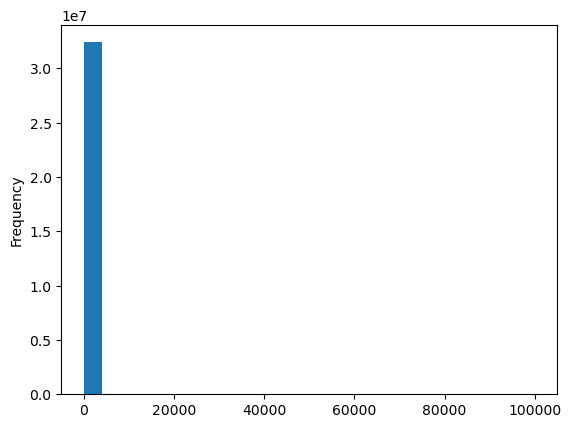

In [10]:
#Historgram with bins of 25
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

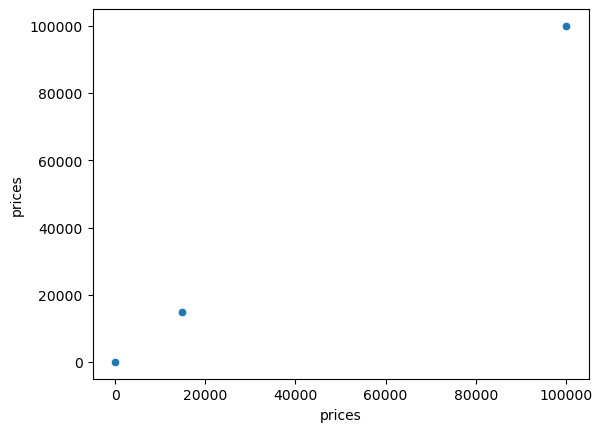

In [11]:
#Scatter plot to explore the data anomaly (expose the outliers)
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [12]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busy_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,median_order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,7.337671,Low spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular day,Most orders,40,Regular customer,7.337671,Low spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regular day,Average orders,4,New customer,9.358333,Low spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busy day,Average orders,4,New customer,9.358333,Low spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busy day,Average orders,16,Regular customer,7.284783,Low spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busy day,Average orders,39,Regular customer,7.941111,Low spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busy day,Most orders,39,Regular customer,7.941111,Low spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slow day,Most orders,15,Regular customer,8.718667,Low spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slow day,Average orders,12,Regular customer,8.907101,Low spender,12.0,Regular customer


In [13]:
#Turn tha 5127 anomalous valuse into NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
#Check results max and count of NaN
ords_prods_merge['prices'].max(), ords_prods_merge['prices'].isnull().sum()

(25.0, 5127)

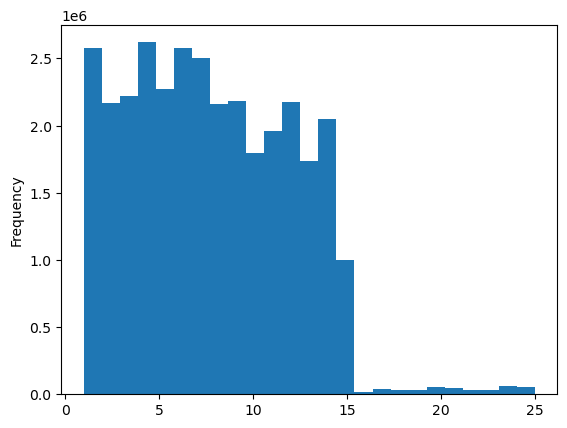

In [15]:
#Historgram with bins of 25
hist1 = ords_prods_merge['prices'].plot.hist(bins = 25)

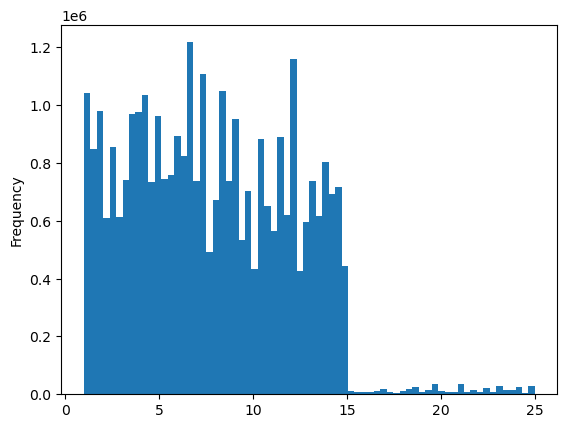

In [16]:
#Historgram with bins of 70 (to increase granularity)
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
#Export histogram via variable.figure.savefig()
hist1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices1.png'))
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices2.png'))

# 05. Line Charts

### Sampling of a 70/30 split

In [18]:
#Set a random seed value of 4 for reproducability
np.random.seed(4)

In [19]:
#Make a randomized boolean list for ords_prods_merge
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
#Make a dataframe for the 70%
big = ords_prods_merge[dev]

In [21]:
#Make a dataframe for the remaining values
small = ords_prods_merge[~dev]

In [22]:
#Data check: original # rows, row 'big' + rows 'small', % in 'big', % in 'small'
len(ords_prods_merge), len(big) + len(small), len(big)/len(ords_prods_merge), len(small)/len(ords_prods_merge)

(32404859, 32404859, 0.7000111001871664, 0.2999888998128336)

Check.

In [23]:
#Randomization check
ords_prods_merge['prices'].mean(), big['prices'].mean(), small['prices'].mean()

(7.790994092171152, 7.79087984122341, 7.791260694244707)

Close enough.

In [24]:
#reduce the dataframe to necessary columns for the line chart
df_2 = small[['orders_day_of_week','prices']]

In [25]:
df_2.shape

(9721098, 2)

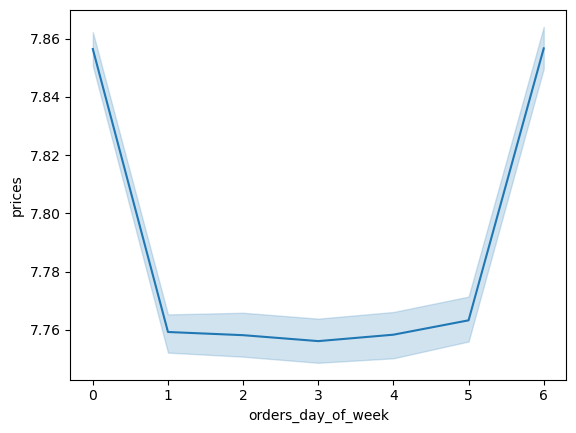

In [26]:
#Make a line chart
line1 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [27]:
#Export line chart via variable.figure.savefig()
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow_1.png'))

# 06. Task

### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data

See section 01 above.

In [3]:
#Importing up-to-date project data
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
ords_prods_cust.shape

(32404859, 29)

In [5]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,mean_price,spender_flag,median_order_frequency,order_frequency_flag,gender,state,age,num_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


In [6]:
ords_prods_cust.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_order_frequency,age,num_dependants,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,7.790996e+00,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,7.348183e-01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.378488e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.811940e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.229328e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.320000e+01,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

See sections 03, 04, and 05 above.

### 3. Create a histogram of the “order_hour_of_day” column.

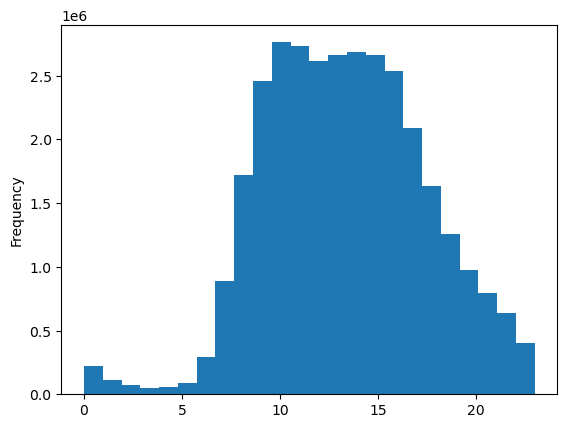

In [7]:
#Historgram with 24 bins
hist_orders_hod = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

The order_hour_of_day histogram shows the slowest point in the day between 11:00 PM and 6:00 AM as well as the busiest point in the day between 10:00 AM and 4:00 PM.

In [19]:
#Export histogram via variable.figure.savefig()
hist_orders_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_orders_hod.png'))

### 4.  Create a bar chart from the “loyalty_flag” column.

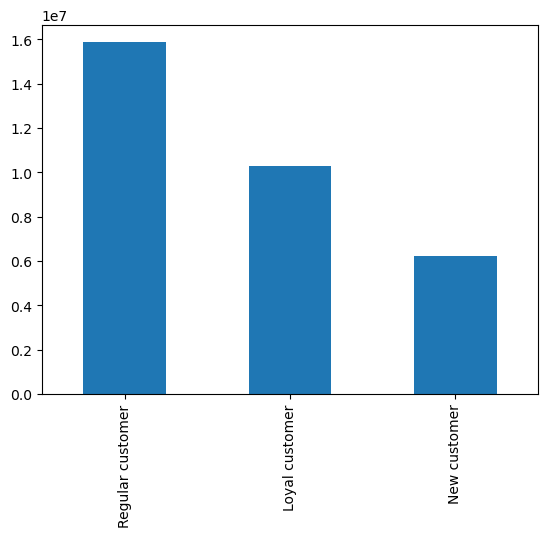

In [8]:
#Bar chart for loyalty flag
bar_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

In [20]:
#Export histogram via variable.figure.savefig()
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [9]:
#Set a random seed value of 4 for reproducability
np.random.seed(4)

In [10]:
#Make a randomized boolean list for ords_prods_merge
opc_dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [11]:
#Make a dataframe for the 70% with the relevant
opc_big = ords_prods_cust[opc_dev]

In [12]:
#Make a dataframe for the remaining values
opc_small = ords_prods_cust[~opc_dev]

In [13]:
#Data check: original # rows, row 'big' + rows 'small', % in 'big', % in 'small'
len(ords_prods_cust), len(opc_big) + len(opc_small), len(opc_big)/len(ords_prods_cust), len(opc_small)/len(ords_prods_cust)

(32404859, 32404859, 0.7000111001871664, 0.2999888998128336)

Check.

In [14]:
#Randomization check
ords_prods_cust['prices'].mean(), opc_big['prices'].mean(), opc_small['prices'].mean()

(7.790994092347015, 7.791771887012884, 7.789179138893408)

Close enough.

In [15]:
#reduce the small sample dataframe to necessary columns for the line chart
opc_2 = opc_small[['order_hour_of_day','prices']]

In [16]:
opc_2.shape

(9721098, 2)

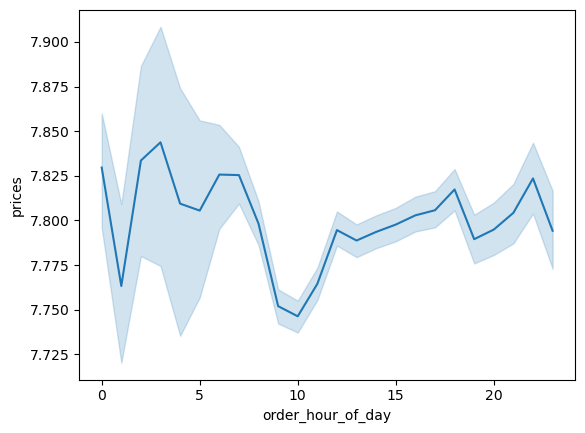

In [17]:
#Make a line chart
opc_line = sns.lineplot(data = opc_2, x = 'order_hour_of_day',y = 'prices')

Notes: It seems that higher priced items are bought between 3:00 AM and 7:00 AM, but with a lower degree of predictability; while less expensive items are purchased between 9:00 AM and 11:00 AM with a higher degree of predeictability; and average-priced items are bought with reasonable predictability and consistency between 12:00 PM and 11:00 PM.

In [21]:
#Export line chart via variable.figure.savefig()
opc_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))

### 6. Make a line chart for age and number of dependents

In [18]:
#reduce the small sample dataframe to necessary columns for the line chart
opc_age_dep = opc_small[['age','num_dependants']]

In [26]:
opc_age_dep.shape

(9721098, 2)

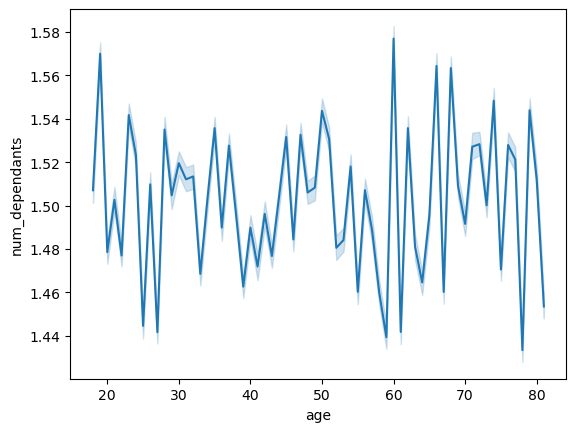

In [22]:
#Make a line chart
line_age_dep = sns.lineplot(data = opc_age_dep, x = 'age',y = 'num_dependants')

Notes: The line chart does not reveal any definite patterns. There seems to be a high degree of variation between age and number of dependents.

In [23]:
#Export line chart via variable.figure.savefig()
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

### 7. Make a scatter plot for age and income

In [24]:
#reduce the small sample dataframe to necessary columns for the scatter plot
opc_age_inc = opc_small[['age','income']]

In [25]:
opc_age_inc.shape

(9721098, 2)

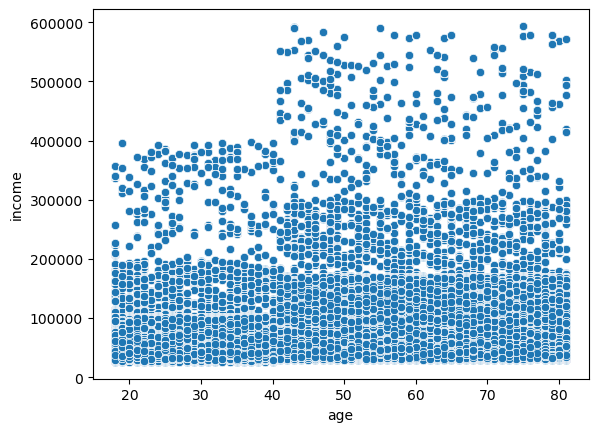

In [28]:
#Make a scatter plot
sctr_age_inc = sns.scatterplot(x = 'age', y = 'income',data = opc_age_inc)

Notes: 18-40 year olds have the income range - averaging between 25,000 and 200,000 with an upper limit of 400,000. 41-81 year olds have an average income of 25,000 to 300,000 with an upper limit of 600,000. 

Those 40 and under tend to have less spending power than those over 40. However, to a comparison of income to debt ratio to age would give a more accurate indicator of spending power.

In [29]:
#Export line chart via variable.figure.savefig()
sctr_age_inc.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

### 8. Export your visualizations as “.png” files in your relevant project folder.

Completed at the end of each chart.